$P = K [R \; | \; t]$ &ndash; проекционная матрица камеры

In [8]:
import os 
import sys

# add parent dir to import path 
parent_dir = os.path.abspath('..')
sys.path.append(parent_dir)

In [9]:
import numpy as np
from utils.camera import Camera

In [9]:
points = np.loadtxt('../assets/house.p3d').T
points = np.vstack((points, np.ones(points.shape[1])))
# points

In [10]:
P = np.hstack((np.eye(3), np.array([[0], [0], [-10]])))
print(P)

[[  1.   0.   0.   0.]
 [  0.   1.   0.   0.]
 [  0.   0.   1. -10.]]


In [11]:
cam = Camera(P)
x = cam.project(points)
# x

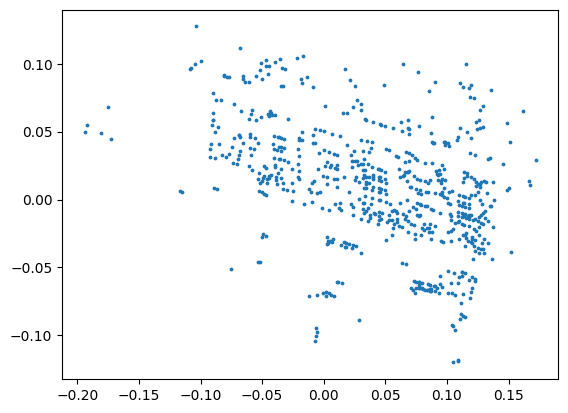

In [12]:
import matplotlib.pyplot as plt

plt.scatter(x[0], x[1], s=3)
plt.show()

In [13]:
np.random.seed(42)
rotation_axis =  0.7 * np.random.rand(3)
print(rotation_axis)

# больше информации о том, как строится эта матрица?
R = Camera.rotation_matrix(rotation_axis)
# R

[0.26217808 0.66550001 0.51239576]


In [14]:
P @ R

array([[  0.79915746,  -0.38770026,   0.67670156,   0.        ],
       [  0.50437609,   0.84988402,  -0.07761849,   0.        ],
       [ -0.1767575 ,   0.30564747,   0.89213285, -10.        ]])

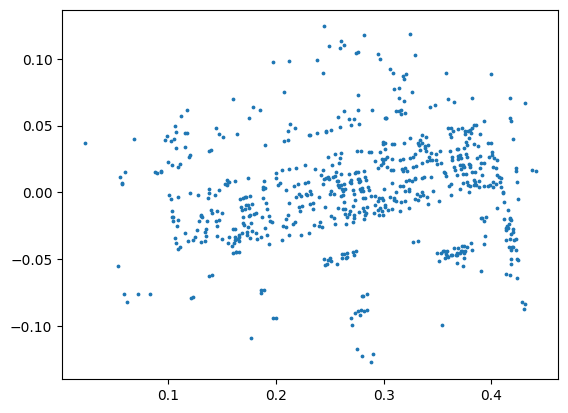

In [15]:
import matplotlib.pyplot as plt

cam2 = Camera(P @ R)
x = cam2.project(points)
plt.scatter(x[0], x[1], s=3)
plt.show()

In [16]:
K = np.array([[10,   0, 50],
              [0,   10, 30],
              [0,    0,  1]])
tmp = Camera.rotation_matrix([0,0,1])[:3,:3]
Rt = np.hstack((tmp, np.array([[50],[40],[30]])))
cam = Camera(K @ Rt)
print(K)
print(Rt)

[[10  0 50]
 [ 0 10 30]
 [ 0  0  1]]
[[ 0.54030231 -0.84147098  0.         50.        ]
 [ 0.84147098  0.54030231  0.         40.        ]
 [ 0.          0.          1.         30.        ]]


In [17]:
print(np.linalg.inv(K) @ K @ Rt[:,:3])
print(np.linalg.inv(K) @ K @ Rt[:,3])

[[ 0.54030231 -0.84147098  0.        ]
 [ 0.84147098  0.54030231  0.        ]
 [ 0.          0.          1.        ]]
[50. 40. 30.]


In [18]:
np.linalg.det(np.dot(K, Rt[:,:3]))

100.00000000000004

In [19]:
np.linalg.inv(K)

array([[ 0.1,  0. , -5. ],
       [ 0. ,  0.1, -3. ],
       [ 0. ,  0. ,  1. ]])

In [20]:
for m in cam.factor_camera_matrix():
    print(m)

[[ 1.00000000e+01 -1.77635684e-15 -5.22592448e+01]
 [ 0.00000000e+00 -1.00000000e+01 -2.58644801e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 0.54030231  0.84147098  0.        ]
 [ 0.84147098 -0.54030231  0.        ]
 [ 0.          0.          1.        ]]
[ 356.77773451 -207.59344019   30.        ]


In [21]:
print(cam.get_camera_center())

[ -18.08397608 -412.38132604  -30.        ]
